In [1]:
import matplotlib.pyplot as plt; import numpy as np; import pandas as pd
from scipy import stats
from IPython import display
import seaborn as sns
from ContributorCentricFunctions import *
%matplotlib inline

In [2]:
years = [2005+i for i in range(12)]
years

[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [3]:
study_tiles = json.loads(open('study_tiles_with_compare_tiles.json','r').read())
print("Found {0} tiles.".format(len(study_tiles)))

Found 7 tiles.


# Study Tiles: Load data for a specific study tile

In [4]:
for idx, tile in enumerate(study_tiles):
    print(idx, tile['name'])

0 Port Au Prince, Haiti
1 Tacloban, Philippines
2 Monrovia, Liberia
3 Trisuli Bazar, Nepal
4 Heidelberg, Germany
5 London, UK
6 Manhattan, NY


## 1. Get the `user_list` by setting the `study_tile_idx` to the appropriate study tile

In [5]:
study_tile_idx = 1

In [6]:
reset() #Safety for the db connections
study_tiles[study_tile_idx]['user_list'] = get_all_users_who_edited_tile(study_tiles[study_tile_idx])

2005 . 2006 . 2007 . 2008 . 2009 . 2010 . 2011 . 2012 . 2013 . 2014 . 2015 . 2016 . 

In [7]:
print("Found: {0} users".format(len(study_tiles[study_tile_idx]['user_list'])))

Found: 325 users


## 2. Build the User Distributions
If this doesn't run, run the cell 2 above again)

In [8]:
study_tiles[study_tile_idx]['users'] = build_user_distributions(study_tiles[study_tile_idx]['user_list'])
display.display(study_tiles[study_tile_idx]['users'][study_tiles[study_tile_idx]['user_list'][0]]['df'].head(2))

 1463/ ~ 1560

,quadkey,year,uid,buildings,road_km,amenities,edits,num_days,user_stats_uid,user_name,total_year,total_buildings,total_road_km,total_amenities,total_edits,total_active_days
0,120221323223,2006,137,0,0.0,0,3,1,137,simone,2006,0,0.0,0,24,1
1,120221323222,2006,137,0,0.0,0,21,1,137,simone,2006,0,0.0,0,24,1


## 3. Get tile focus for each user

In [9]:
process_dictionary_of_users(study_tiles[study_tile_idx]['users'])
display.display(study_tiles[study_tile_idx]['users'][study_tiles[study_tile_idx]['user_list'][0]]['tiles'].head(2))
display.display(study_tiles[study_tile_idx]['users'][study_tiles[study_tile_idx]['user_list'][0]]['annual'].head(2))

 325/325

,road_km,num_days,amenities,edits,buildings,percent_user_road_km,percent_user_buildings,percent_user_amenities,percent_user_edits
quadkey,,,,,,,,,
021112001110,0.0,1,0,1,0,0.0,0.0,0.0,0.000174
021112001111,0.0,1,0,1,0,0.0,0.0,0.0,0.000174


,uid,user_name,year,total_buildings,total_road_km,total_amenities,total_edits,total_active_days
0,137,simone,2006,0,0.0000,0,24,1
1,137,simone,2007,0,92.2827,2,153,8


## 3.5 Get Study Tile Focus

In [10]:
process_dictionary_of_users_for_study_tile_stats(study_tiles[study_tile_idx]['users'], study_tiles[study_tile_idx]['quad'])
display.display(study_tiles[study_tile_idx]['users'][study_tiles[study_tile_idx]['user_list'][0]]['toi'].head(2))

 324/325

,quadkey,year,uid,buildings,road_km,amenities,edits,num_days,user_stats_uid,user_name,total_year,total_buildings,total_road_km,total_amenities,total_edits,total_active_days
6919,132312223332,2013,137,1,0.0,0,6,1,137,simone,2013,692,180.318,289,1963,64


## 4. Who is mapping what: Build Current Tile DF

In [11]:
current_tile_df = build_all_stats_for_tile(study_tiles[study_tile_idx])
current_tile_df.head(2)

,road_km,num_days,amenities,edits,buildings,percent_user_road_km,percent_user_buildings,percent_user_amenities,percent_user_edits,uid,total_editing_days_ever,total_buildings_ever,total_road_km_ever,total_amenities_ever,total_edits_ever,percent_tile_road_km,percent_tile_buildings,percent_tile_amenities,percent_tile_edits
0,0.0,1,1,12,2,0.0,1.526718,0.052056,0.170309,1772032,76,131,33.189262,1921,7046,0.0,0.006621,0.136426,0.034059
1,0.0,1,0,1,0,0.0,0.000000,0.000000,0.000313,188930,1660,225780,6118.094000,9855,319563,0.0,0.000000,0.000000,0.002838


### Processed Study tiles now have the following attributes: 

- **name**: Name of Region
- **user_list**: List of UIDs of users who have edited on this tile
- **users**: Dictionary, keyed by UID
  - `uid`:
    - **df**: Full dataframe of all edits on all tiles by this user
    - **tiles**: DataFrame of unique tiles, summed over all years
    - **annual**: DataFrame of Editing Aggregates over all tiles, per year

# Begin Analysis of Tile

In [12]:
print("Current Study Tile: {0}".format(study_tiles[study_tile_idx]['name']))
print("\tUsers: {0}".format(len(study_tiles[study_tile_idx]['user_list'])))
print("Current_tile_df size: {0} (Should match the user count)".format(len(current_tile_df)))

Current Study Tile: Tacloban, Philippines
	Users: 325
Current_tile_df size: 325 (Should match the user count)


## Percentage of a User's edits (of all time) that occur on this tile: 

# 1.  Users active on this tile overtime

In [13]:
overtime_df = get_active_users_overtime_df(study_tiles[study_tile_idx]['users'])

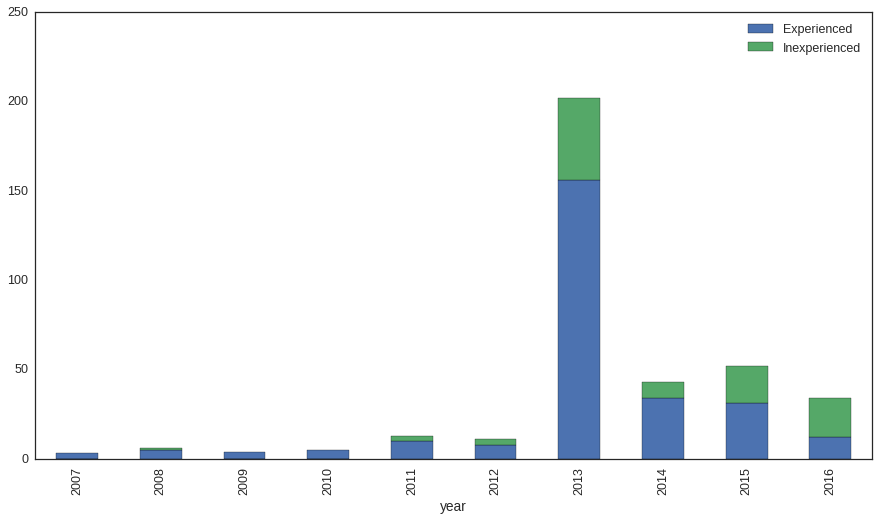

In [14]:
sns.set(font_scale=1.25)
plt.style.use('seaborn-white')
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15,8), facecolor='w', edgecolor='k')

#How many days (to date) is considered experienced?
threshold = 7

gt_10 = overtime_df.query("active_days_to_date>={0}".format(threshold)).groupby('year').aggregate({'uid':pd.Series.nunique})
lt_10 = overtime_df.query("active_days_to_date<{0}".format(threshold)).groupby('year').aggregate({'uid':pd.Series.nunique})

gt_10.columns = ['Experienced']
lt_10.columns = ['Inexperienced']

gt_10.join(lt_10).plot(ax=axs,kind='bar',stacked=True)

# 2: User Experience 

Who's Mapping Buildings and Roads?

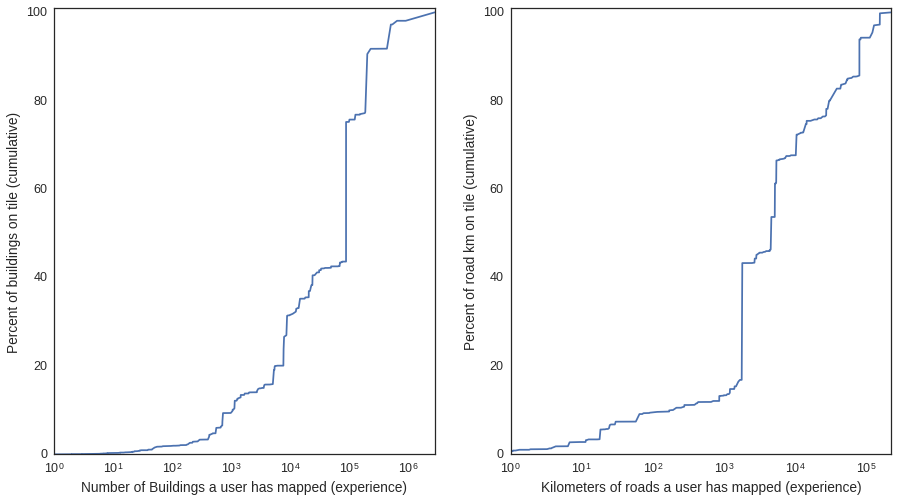

In [15]:
sns.set(font_scale=1.25)
plt.style.use('seaborn-white')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,8), facecolor='w', edgecolor='k')

b_view = current_tile_df.sort_values(by='total_buildings_ever')
b_view['cumulative_percent'] = b_view.percent_tile_buildings.cumsum()

b_view.plot(ax=axs[0],x='total_buildings_ever',y='cumulative_percent', logx=True,legend=None)

axs[0].set_ylabel('Percent of buildings on tile (cumulative)')
axs[0].set_xlabel('Number of Buildings a user has mapped (experience)')


r_view = current_tile_df.sort_values(by='total_road_km_ever')
r_view['cumulative_percent'] = r_view.percent_tile_road_km.cumsum()

r_view.plot(ax=axs[1],x='total_road_km_ever',y='cumulative_percent', logx=True,legend=None)

axs[1].set_ylabel('Percent of road km on tile (cumulative)')
axs[1].set_xlabel('Kilometers of roads a user has mapped (experience)')

for ax in axs:
    ax.set_ylim(0,101)
    ax.set_xlim(1)

# 3. User Focus

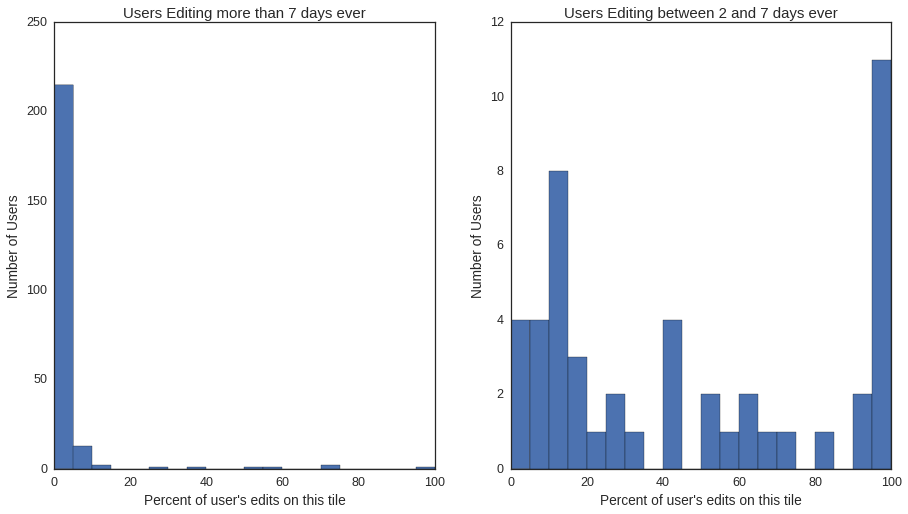

In [16]:
sns.set(font_scale=1.25)
plt.style.use('seaborn-white')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,8), facecolor='w', edgecolor='k')

current_tile_df.query('total_editing_days_ever>7').query('total_editing_days_ever>1').plot(ax=axs[0], kind='hist',y=['percent_user_edits'], legend=None, bins=np.arange(0,101,5))
axs[0].set_title('Users Editing more than 7 days ever')

current_tile_df.query('total_editing_days_ever<7').query('total_editing_days_ever>1').plot(ax=axs[1], kind='hist',y=['percent_user_edits'], legend=None, bins=np.arange(0,101,5))
axs[1].set_title('Users Editing between 2 and 7 days ever')

for ax in axs:
    ax.set_xlabel("Percent of user's edits on this tile")
    ax.set_ylabel('Number of Users')

This is still not _quite_ right, there are better ways to show this type of _User Focus_

<br>
<br>
<hr>

# Tacloban

First, basic stats: 

In [17]:
print("Users on Study Tile: {0}, {1}".format(len(study_tiles[study_tile_idx]['user_list']), len(current_tile_df)))

Users on Study Tile: 325, 325


# 1.  Users active on the tiles overtime

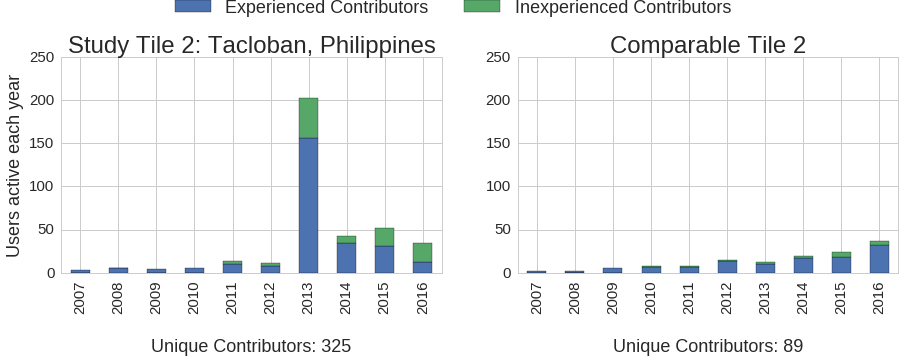

In [77]:
sns.set(font_scale=1.5)
plt.style.use('seaborn-whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15,6), facecolor='w', edgecolor='k')
plt.subplots_adjust(left=None, bottom=0.4, right=None, top=None, wspace=None, hspace=0.1)

#How many days (to date) is considered experienced?
threshold = 7

#Study Tile
gt_10 = overtime_df.query("active_days_to_date>={0}".format(threshold)).groupby('year').aggregate({'uid':pd.Series.nunique})
lt_10 = overtime_df.query("active_days_to_date<{0}".format(threshold)).groupby('year').aggregate({'uid':pd.Series.nunique})
gt_10.columns = ['Experienced Contributors']
lt_10.columns = ['Inexperienced Contributors']
gt_10.join(lt_10).plot(ax=axs,kind='bar',stacked=True)

axs.set_ylabel("Users active each year",fontsize=18)
axs.set_title("Study Tile {0}: ".format(study_tile_idx+1)+study_tiles[study_tile_idx]['name'],fontsize=24)
axs.set_xlabel("\nUnique Contributors: {0}".format(len(current_tile_df)),fontsize=18)

axs.legend_.remove()

handles, labels = axs.get_legend_handles_labels()
plt.figlegend(handles, labels, loc='upper center', ncol=2, fontsize=18, borderaxespad=-0.4);

## Analysis

The huge spike in the number of contributors with less than 10% of their edits on this tile likely represents the massive influx of experienced editors who participated in the mapping event.

In [73]:
print(" Ratio of Experienced to Inexperienced {0:.1f}:1".format(
      (len(overtime_df.query('year==2010').query('active_days_to_date>=7')) / 
           len(overtime_df.query('year==2010').query('active_days_to_date<7')))
      ))

 Ratio of Experienced to Inexperienced 3.4:1


# Compare Buildings & Roads Across

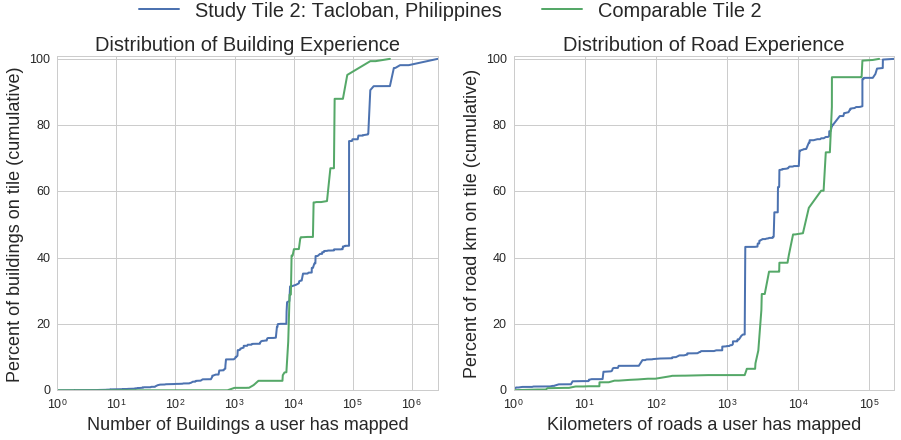

In [84]:
sns.set(font_scale=1.25)
plt.style.use('seaborn-whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,10), facecolor='w', edgecolor='k')

#Buildings
b_axis = axs
b_view = current_tile_df.sort_values(by='total_buildings_ever')
b_view['cumulative_percent'] = b_view.percent_tile_buildings.cumsum()
b_view.plot(ax=b_axis,x='total_buildings_ever',y='cumulative_percent', logx=True,label=study_tiles[study_tile_idx]['name'], lw=2)

# compare_b_view = compare_tile_df.sort_values(by='total_buildings_ever')
# compare_b_view['cumulative_percent'] = compare_b_view.percent_tile_buildings.cumsum()
# compare_b_view.plot(ax=b_axis,x='total_buildings_ever',y='cumulative_percent', logx=True,label="Similar Tile", lw=2)

b_axis.set_ylabel('Percent of buildings on tile (cumulative)', fontsize=18)
b_axis.set_xlabel('Number of Buildings a user has mapped', fontsize=18)

b_axis.set_title("Distribution of Building Experience", fontsize=20)

#Roads
r_axis = axs
r_view = current_tile_df.sort_values(by='total_road_km_ever')
r_view['cumulative_percent'] = r_view.percent_tile_road_km.cumsum()
r_view.plot(ax=r_axis,x='total_road_km_ever',y='cumulative_percent', logx=True, lw=2,
            label="Study Tile {0}: ".format(study_tile_idx+1)+study_tiles[study_tile_idx]['name'])

# compare_r_view = compare_tile_df.sort_values(by='total_road_km_ever')
# compare_r_view['cumulative_percent'] = compare_r_view.percent_tile_road_km.cumsum()
# compare_r_view.plot(ax=r_axis,x='total_road_km_ever',y='cumulative_percent', logx=True, lw=2,
#                     label="Comparable Tile {0}".format(study_tile_idx+1))

r_axis.set_ylabel('Percent of road km on tile (cumulative)',fontsize=18)
r_axis.set_xlabel('Kilometers of roads a user has mapped',fontsize=18)

r_axis.set_title("Distribution of Road Experience", fontsize=20)

# for ax in [r_axis, b_axis]:
axs.set_ylim(0,101)
axs.set_xlim(1)
axs.legend_.remove()
    
handles, labels = axs.get_legend_handles_labels()
plt.figlegend(handles, labels, loc='upper center', ncol=2, fontsize=20, borderaxespad=-0.3);

In [ ]:
sns.set(font_scale=1.25)
plt.style.use('seaborn-white')
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,10), facecolor='w', edgecolor='k')

current_tile_df.plot(ax=axs, kind='hist',y=['percent_user_edits'], legend=None, bins=np.arange(0,101,10))
axs.set_title(study_tiles[study_tile_idx]['name'] + " - Users: "+str(len(current_tile_df)))


axs.set_xlabel("Percentage of a user's edits that occur on this tile")
axs.set_ylabel('Number of Users')
plt.suptitle("Percentage of User's Edits (total) Occuring on this tile",fontsize=18)

print("Study Tile: {0:.0f}% of contributors have more than 25% of their edits on this tile".format(len(current_tile_df.query('percent_user_edits>25')) / len(current_tile_df)*100))

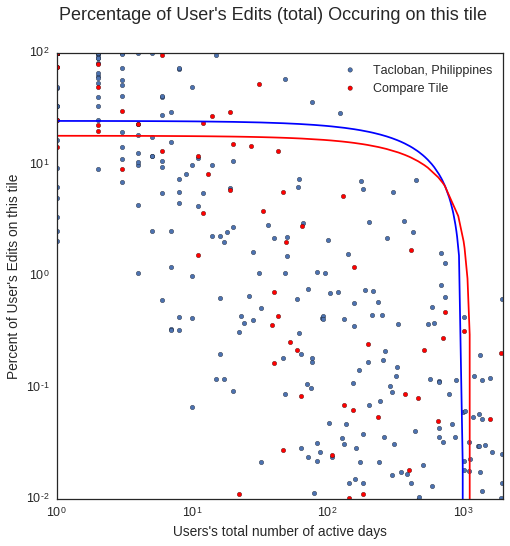

In [50]:
sns.set(font_scale=1.25)
plt.style.use('seaborn-white')
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8,8), facecolor='w', edgecolor='k')

current_tile_df.sort_values(by='total_editing_days_ever').plot(kind='scatter',
    ax=axs,x='total_editing_days_ever',y='percent_user_edits', label=study_tiles[study_tile_idx]['name'])

compare_tile_df.sort_values(by='total_editing_days_ever').plot(kind='scatter', 
    ax=axs,x='total_editing_days_ever',y='percent_user_edits', color='red', label="Compare Tile")

df = pd.DataFrame(current_tile_df.sort_values(by='total_editing_days_ever')[['total_editing_days_ever','percent_user_edits']])
fit = np.polyfit( df.total_editing_days_ever, df.percent_user_edits, deg=1)
axs.plot(df.total_editing_days_ever, fit[0] * df.total_editing_days_ever + fit[1], color='blue')

comparedf = pd.DataFrame(compare_tile_df.sort_values(by='total_editing_days_ever')[['total_editing_days_ever','percent_user_edits']])
compare_fit = np.polyfit( comparedf.total_editing_days_ever, comparedf.percent_user_edits, deg=1)
axs.plot(comparedf.total_editing_days_ever, compare_fit[0] * comparedf.total_editing_days_ever + compare_fit[1], color='red')

axs.set_xscale('log')
axs.set_yscale('log')

axs.set_xlim(1,df.total_editing_days_ever.max())
axs.set_ylim(0.01,100)
axs.set_xlabel("Users's total number of active days")
axs.set_ylabel("Percent of User's Edits on this tile")
plt.suptitle("Percentage of User's Edits (total) Occuring on this tile",fontsize=18)

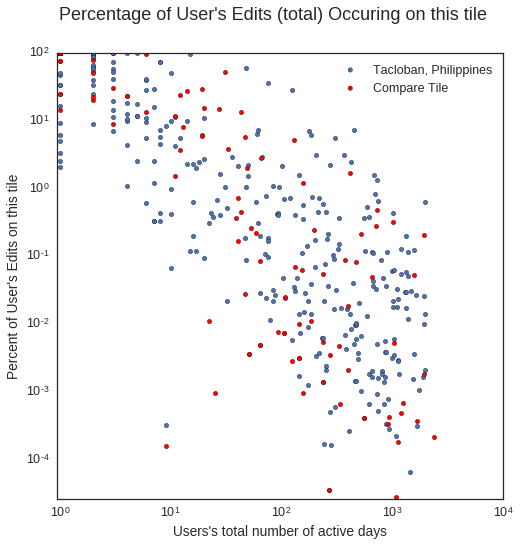

In [51]:
sns.set(font_scale=1.25)
plt.style.use('seaborn-white')
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8,8), facecolor='w', edgecolor='k')

current_tile_df.sort_values(by='total_editing_days_ever').plot(kind='scatter',
    ax=axs,x='total_editing_days_ever',y='percent_user_edits', loglog=True, label=study_tiles[study_tile_idx]['name'])

compare_tile_df.sort_values(by='total_editing_days_ever').plot(kind='scatter', 
    ax=axs,x='total_editing_days_ever',y='percent_user_edits', loglog=True, color='red', label="Compare Tile")

axs.set_xlim(0,10000)
axs.set_ylim(0,100)
axs.set_xlabel("Users's total number of active days")
axs.set_ylabel("Percent of User's Edits on this tile")
plt.suptitle("Percentage of User's Edits (total) Occuring on this tile",fontsize=18)